# Leitura de dados

Antes de começar a classificação de fato, é importante conhecer um pouco sobre os dados. Vamos começar preparando o notebook com os `import`s necessários:

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from utils import read_data, prepare_data

Utilizaremos a função `read_data`, definida no arquivo `utils.py`, para ler os dados em seus respectivos diretórios. Por enquanto, trabalhar apenas com os dados de treino é suficiente. Depois da leitura, podemos olhar para a "cara" dos dados usando o método `head()` do objeto `DataFrame`:

In [2]:
labels = {'Fall': 1, 'ADL': 2}

fall = read_data('Dataset/Fall/Train', labels['Fall'])
adl = read_data('Dataset/ADL/Train', labels['ADL'])

fall.head()

Time  $SV_{total}$     $A_x$     $A_y$     $A_z$  Class
0 0    -3      1.038175  0.043479  0.913801 -0.490800      1
  1     1      1.036531  0.027512  0.912818 -0.490308      1
  2     8      1.045772  0.031934  0.916257 -0.503082      1
  3    24      1.060670  0.039795  0.927557 -0.512908      1
  4    33      1.063284  0.059937  0.932961 -0.506521      1

Com a leitura de dados completa, podemos começar a fazer algumas análises para aprender um pouco sobre o conjunto de dados. Sabemos que os dados estão divididos em duas classes diferentes: $ADL$ e $Fall$. Podemos começar a criar uma intuição sobre o conjunto analisando graficamente algumas instâncias de dados.

A função a seguir plota os valores $SV_{total}$ de uma instância aleatória. Fazendo isso uma vez para cada classe, temos uma comparação visual bastante intuitiva das diferenças que podemos esperar entre dados de classes diferentes.

Como a instância de dado selecionada é aleatória, cada vez que executarmos essa célula poderemos observar uma saída diferente.

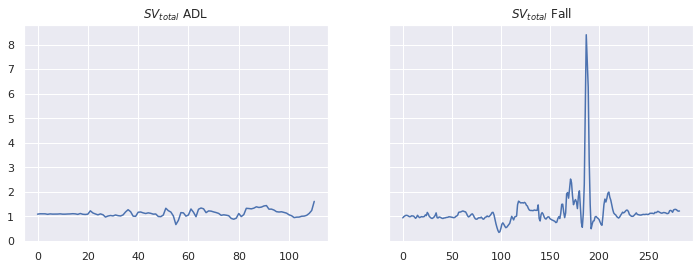

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

def plot(data, ax, col='$SV_{total}$'):
    i = np.random.randint(data.index.levels[0].shape[0])
    sv_total = data.loc[i][col]
    x = list(range(len(sv_total)))
    ax.plot(x, sv_total)
    
plot(adl, ax[0])
ax[0].set_title('$SV_{total}$ ADL')
    
plot(fall, ax[1])
ax[1].set_title('$SV_{total}$ Fall');

Podemos perceber que, em geral, os dados da classe $Fall$ têm mudanças muito mais abruptas e de maior magnitude que as instâncias da classe $ADL$. Isso condiz com o que é de se esperar, visto que uma queda pode ser interpretada como uma anomalia quando comparada ao "movimento normal" que a antecede.

Apesar dos gráficos anteriores, esses não serão os dados que utilizaremos durante a classificação. Para reduzir a complexidade do problema, tentaremos extrair apenas as features que parecem mais interessantes. Decidiu-se trabalhar com os 3 valores do acelerômetro e com o valor $SV_{total}$. Para cada um desses valores, calculou-se o valor máximo, médio e o desvio padrão de cada dado.

Desta forma, cada dado é representado por um vetor de 12 dimensões, como podemos ver abaixo:

In [4]:
data, labels = prepare_data(fall, adl)

data[0]

array([ 8.4470677 ,  1.14103963,  0.66193736,  0.66692737, -0.52765352,
        0.42322666,  1.66301963, -0.06337652,  0.65528393,  7.51257448,
        0.61226236,  0.68870506])

Esses valores representam, respectivamente:

$[max(SV_{total}), mean(SV_{total}), std(SV_{total}), max(A_x), mean(A_x), std(A_x), max(A_y), mean(A_y), std(A_y), max(A_z), mean(A_z), std(A_z)]$

Saindo do domínio do tempo, fica mais fácil comparar os dados. Podemos, por exemplo, plotar todos os dados em um plano bidimensional de features:

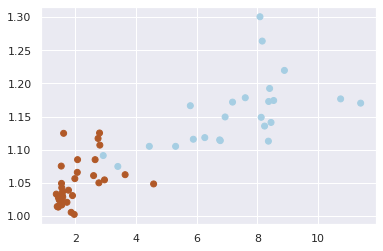

In [41]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=plt.cm.Paired);

Utilizando apenas os valores máximos e médios de $SV_{total}$, podemos observar que é possível obter uma boa separabilidade dos dados, de forma que até mesmo um simples classificador linear poderia obter bons resultados.

Por fim, vamos aproveitar a estrutura de `plot` para podermos verificar o comportamento das acelerações nos eixos x, y e z:

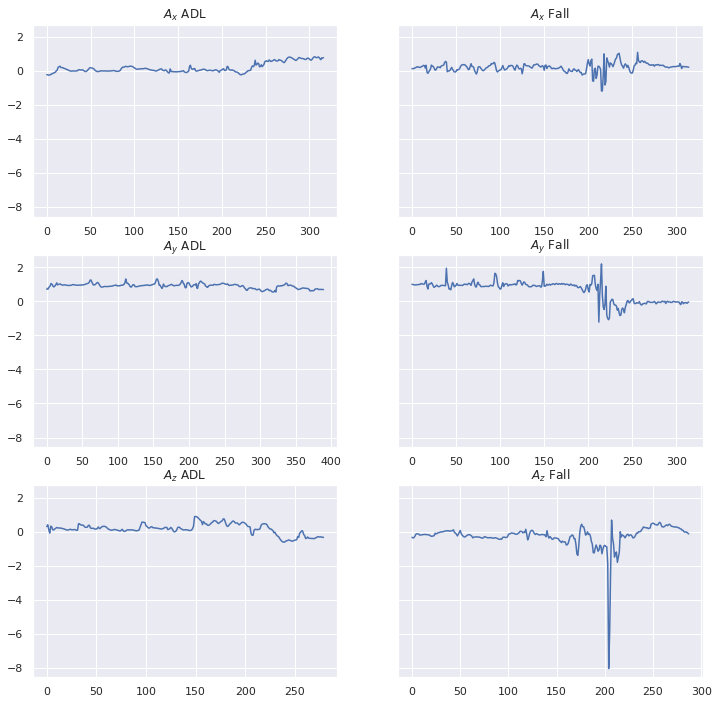

In [42]:
fig, ax = plt.subplots(3, 2, figsize=(12, 12), sharey=True)

plot(adl, ax[0][0], col='$A_x$')
ax[0][0].set_title('$A_x$ ADL')
plot(fall, ax[0][1], col='$A_x$')
ax[0][1].set_title('$A_x$ Fall');

plot(adl, ax[1][0], col='$A_y$')
ax[1][0].set_title('$A_y$ ADL')
plot(fall, ax[1][1], col='$A_y$')
ax[1][1].set_title('$A_y$ Fall');

plot(adl, ax[2][0], col='$A_z$')
ax[2][0].set_title('$A_z$ ADL')
plot(fall, ax[2][1], col='$A_z$')
ax[2][1].set_title('$A_z$ Fall');